In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import pickle 
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/AL-HameedComputers/Desktop/csv/train.csv")

In [4]:
df.shape # Dataframe Rows, Columns

(900000, 33)

In [5]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [6]:
del df['id']
del df['f_27']

In [7]:
df['f_26'].fillna(df['f_26'].mean(), inplace=True)

[0.03162498 0.03179913 0.03149272 0.02864346 0.0287377  0.02995116
 0.02872535 0.03546559 0.02881063 0.03083878 0.028018   0.02918485
 0.032286   0.02627515 0.03029542 0.03097424 0.02739069 0.02982119
 0.02759146 0.04253467 0.03665684 0.04886007 0.04024126 0.04003299
 0.04799379 0.04270676 0.05029589 0.0357391  0.01164458 0.03536755]


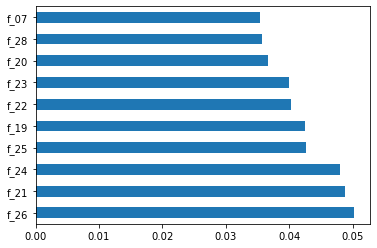

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df.drop(columns=['target'])
y = df['target']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [9]:
newdf = df[["f_19","f_22","f_24","f_26","f_21","f_25","target"]]

In [10]:
newdf.head()

,f_19,f_22,f_24,f_26,f_21,f_25,target
0,0.298218,-2.540739,-2.730628,1.363402,3.058541,-0.208177,0
1,-3.147667,2.278315,-1.217077,-0.058316,2.179050,-3.782194,1
2,2.820733,-1.385775,-0.009121,-3.703488,-0.784235,2.788536,1
3,1.081084,0.572594,1.686035,-0.608601,-2.343819,-2.533098,1
4,-0.126179,-3.912929,2.127649,4.371371,1.133665,-3.306784,1


In [11]:
XTT = newdf.drop(columns=['target'])
yTT = newdf['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(XTT, yTT, test_size=0.2)

In [13]:
modelKNN = KNeighborsClassifier(n_neighbors=15)
resultKNN = modelKNN.fit(X_train, y_train)
prediction_test = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, prediction_test)
print("Model Accuracy (KNN):" "\n", accuracyKNN)

Model Accuracy (KNN):
 0.6566722222222222


In [15]:
dftest = pd.read_csv("C:/Users/AL-HameedComputers/Desktop/csv/train.csv")

In [16]:
dftest.head()


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [17]:
ntest = dftest[['f_26', 'f_21', 'f_24', 'f_25', 'f_19', 'f_22']]
ntest.head()

,f_26,f_21,f_24,f_25,f_19,f_22
0,1.363402,3.058541,-2.730628,-0.208177,0.298218,-2.540739
1,-0.058316,2.179050,-1.217077,-3.782194,-3.147667,2.278315
2,-3.703488,-0.784235,-0.009121,2.788536,2.820733,-1.385775
3,-0.608601,-2.343819,1.686035,-2.533098,1.081084,0.572594
4,4.371371,1.133665,2.127649,-3.306784,-0.126179,-3.912929


In [18]:
newCSV = dftest[['id']]

In [19]:
newCSV

,id
0,0
1,1
2,2
3,3
4,4
...,...
899995,899995
899996,899996
899997,899997
899998,899998


In [20]:
predictionOnTest = modelKNN.predict(ntest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [21]:
predictionOnTest

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [22]:
newCSV['target'] = predictionOnTest

C:\Users\AL-HameedComputers\AppData\Local\Temp\ipykernel_10580\4286474148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCSV['target'] = predictionOnTest


In [23]:
newCSV

,id,target
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
899995,899995,1
899996,899996,1
899997,899997,0
899998,899998,1


In [25]:
newCSV.to_csv('Umer.csv', index=False)